Q1. What is the mathematical formula for a linear SVM?

Ans:

The mathematical formula for a linear Support Vector Machine (SVM) is:

Decision Function:
f(x)=w⋅x+b

Where:

w is the weight vector.

x is the input feature vector.

b is the bias term.

The decision boundary is defined by the hyperplane:

w⋅x+b=0

The goal of the SVM is to find the optimal w and b that maximize the margin between the two classes. The margin is defined as the distance between the hyperplane and the closest data points, called support vectors.

Q2. What is the objective function of a linear SVM?
Ans:

The objective function of a linear SVM consists of maximizing the margin between the two classes and minimizing classification errors. It has two main parts:

Maximizing the Margin: This involves minimizing the norm of the weight vector, which corresponds to maximizing the distance between the decision boundary and the nearest data points, known as support vectors.

Minimizing Classification Errors: This is controlled by a regularization parameter called C, which balances the trade-off between a large margin and the number of misclassified points. The errors are represented by slack variables.

The objective function can be described as:

Minimize:

Half of the squared norm of the weight vector, plus
The sum of the slack variables, each multiplied by the regularization parameter C.

Subject to:

Each data point should be correctly classified with a margin of at least one, minus the slack variable for that point.
The slack variables must be non-negative.

Q3. What is the kernel trick in SVM?

Ans:

The kernel trick in SVM is a technique that allows the algorithm to perform classification in higher-dimensional space without explicitly calculating the coordinates of the data in that space. It works by using a kernel function, which computes the inner products between the images of all pairs of data points in the feature space. This makes it possible to apply SVM in situations where the decision boundary is not linear in the original input space.

The kernel trick transforms the input data into a higher-dimensional space where a linear decision boundary can separate the data more effectively. This transformation is done implicitly, meaning that the actual higher-dimensional representation of the data points does not need to be computed, which saves computational resources.

Common kernel functions include:

Linear Kernel: No transformation, used when the data is already linearly separable.
Polynomial Kernel: Maps the data into a higher-dimensional space with polynomial terms.
Radial Basis Function (RBF) Kernel: Maps the data into an infinite-dimensional space, useful for non-linear classification.

Sigmoid Kernel: Functions similar to a neural network's activation function.
The kernel trick allows SVMs to create complex decision boundaries and handle a wide variety of data distributions.

Q4. What is the role of support vectors in SVM Explain with example

Ans:

Support vectors are the key data points in SVM that lie closest to the decision boundary between different classes. These points are critical because they define the optimal hyperplane that maximizes the margin between the classes. The SVM algorithm focuses on these points to determine the best possible separation.

Role of Support Vectors:

Defining the Decision Boundary: The support vectors are used to calculate the position and orientation of the decision boundary, ensuring the maximum margin between classes.
Influencing the Model: Only the support vectors directly affect the final model. Other data points, which are further from the boundary, do not change the position of the hyperplane.
Reducing Complexity: By relying only on the support vectors, SVM simplifies the problem, focusing computational resources on the most critical data points.
Example:
Consider a 2D classification problem where we have two classes: circles and squares. Most data points from each class are well-separated, but a few are closer to the boundary. These closest points are the support vectors.

For instance, imagine three circles and three squares are near the boundary. These six points are the support vectors. They determine the maximum-margin hyperplane that best separates the circles and squares. Even if other data points are added or removed, the boundary won't change unless they are closer to the boundary than the current support vectors. This shows that the support vectors alone are crucial for defining the SVM model.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Ans:

Hyperplane:

Description: In SVM, the hyperplane is the decision boundary that separates the data points of different classes. It can be a line in 2D, a plane in 3D, or a higher-dimensional surface in more complex spaces.
Example: In a 2D space, if we have two classes of data points, say circles and squares, the hyperplane would be a straight line that best separates these classes.
Marginal Planes:

Description: Marginal planes are the boundaries on either side of the hyperplane that are parallel to it. They are positioned at the distance of the margin from the hyperplane and touch the closest data points from each class (support vectors).
Example: In the same 2D example, the marginal planes would be two parallel lines on either side of the hyperplane, equidistant from it, and touching the nearest circle and square.
Soft Margin:

Description: A soft margin allows some data points to lie inside the margin or on the wrong side of the hyperplane. This approach is used when the data is not perfectly separable. The soft margin introduces a regularization parameter C that controls the trade-off between maximizing the margin and minimizing classification errors.
Example: In a 2D plot with circles and squares, if some circles are on the side of squares and vice versa, the soft margin would still try to separate the classes but would allow these misclassified points to exist within the margin or on the wrong side.
Hard Margin:

Description: A hard margin does not allow any data points inside the margin or on the wrong side of the hyperplane. This approach is only feasible if the data is perfectly linearly separable.
Example: In a perfectly separable 2D dataset, the hard margin would place the hyperplane and marginal planes such that all circles are on one side and all squares are on the other, with no data points inside the margin.
Graphical Representation:

Hyperplane: A straight line (in 2D) or plane (in 3D) separating two classes.
Marginal Planes: Two parallel lines or planes on either side of the hyperplane.
Soft Margin: Marginal planes with some data points inside or misclassified, indicating a compromise between margin size and classification accuracy.
Hard Margin: Marginal planes with no data points inside or misclassified, indicating perfect separability.

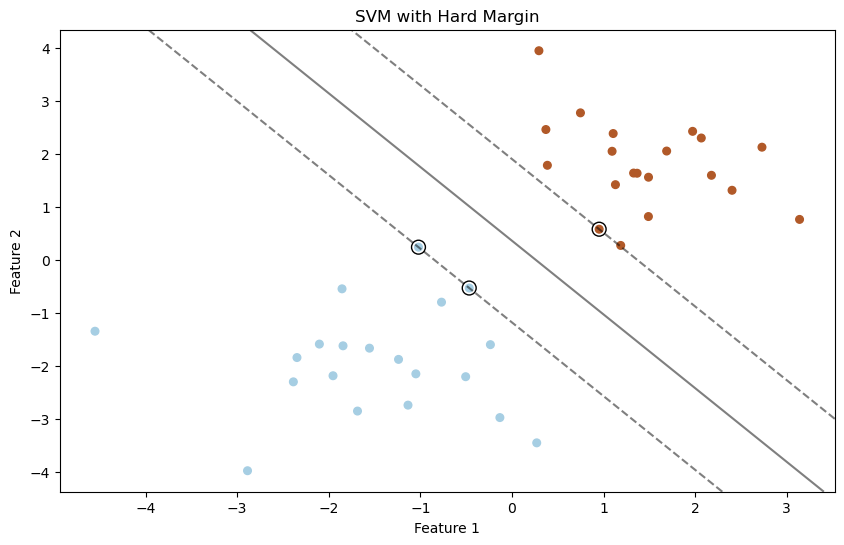

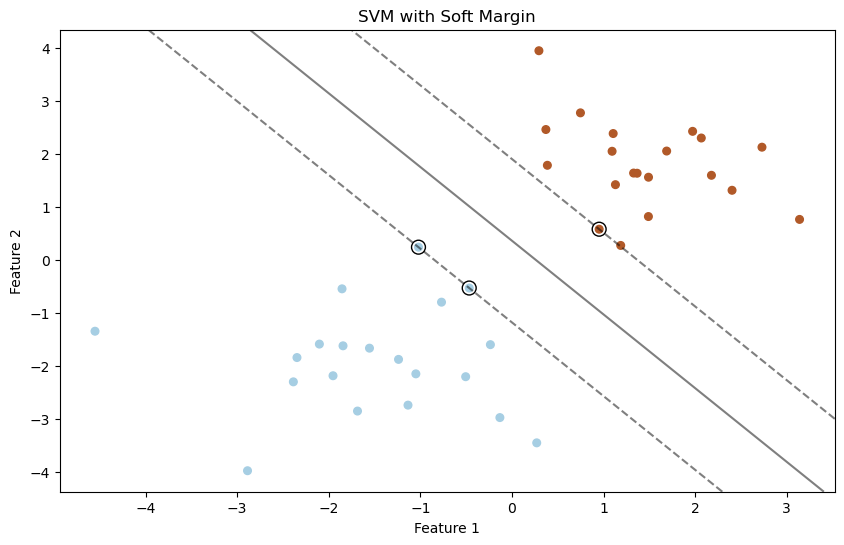

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

clf_hard = svm.SVC(kernel='linear', C=1e10)
clf_hard.fit(X, Y)

clf_soft = svm.SVC(kernel='linear', C=1.0)
clf_soft.fit(X, Y)

def plot_svm(clf, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_svm(clf_hard, "SVM with Hard Margin")

plot_svm(clf_soft, "SVM with Soft Margin")


Q6. SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of the model.

Accuracy with C=0.01: 0.40


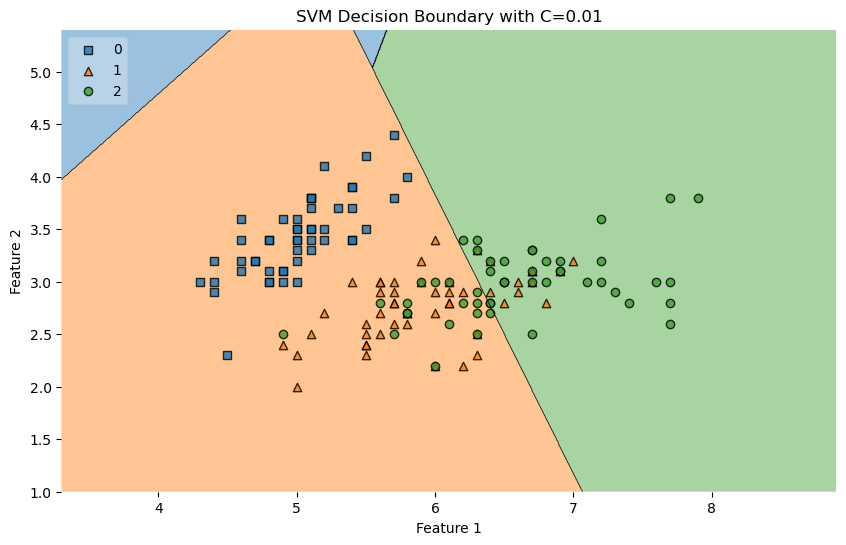

Accuracy with C=1: 0.80


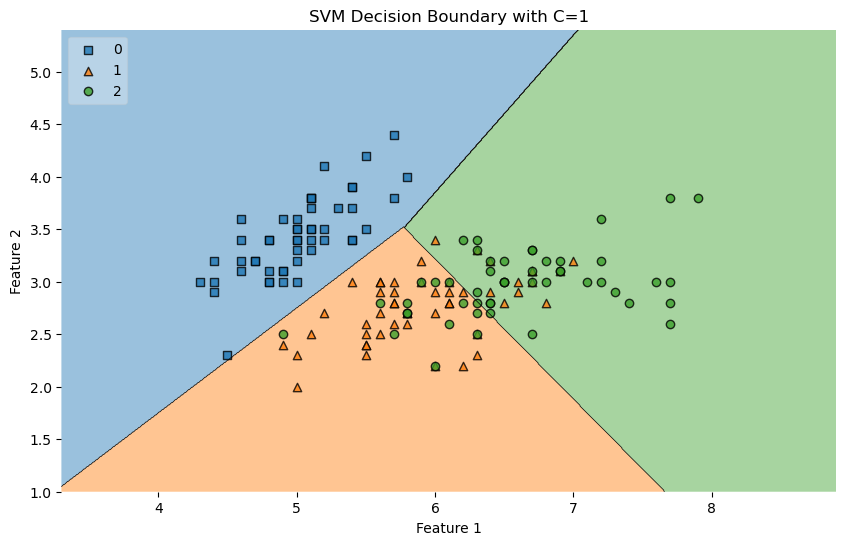

Accuracy with C=100: 0.80


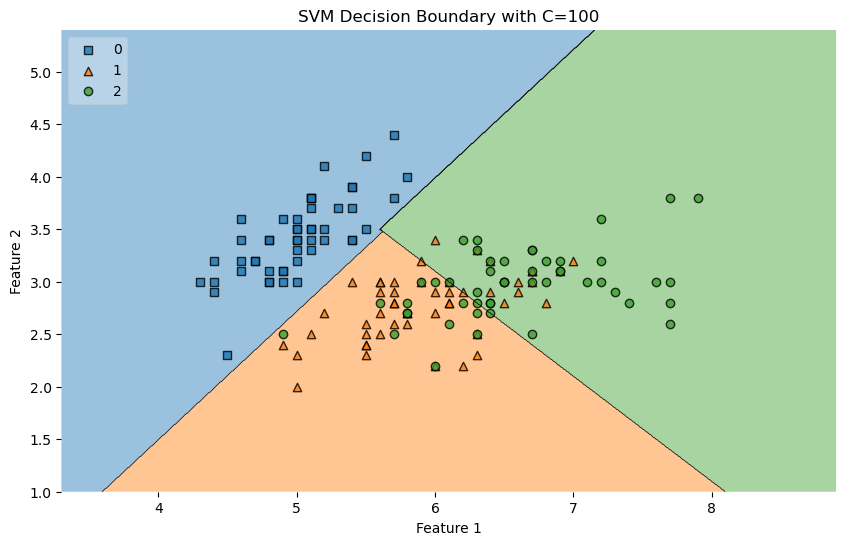

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_and_plot_svm(C):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with C={C}: {accuracy:.2f}")

    plt.figure(figsize=(10, 6))
    
    # Plot decision regions
    plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    
    plt.title(f"SVM Decision Boundary with C={C}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

for C in [0.01, 1, 100]:
    train_and_plot_svm(C)
